# Win Premier league-games


## Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('../artifacts/data.csv')
df.head()

,season_start_year,GW,id,team_h,team_a,train_score,label_1,label_X,label_2,home,...,win_share_latest_5_games_home_home_team,draw_share_latest_5_games_home_home_team,loss_share_latest_5_games_home_home_team,avg_goals_scored_latest_5_games_home_home_team,avg_goals_conceded_latest_5_games_home_home_team,win_share_latest_5_games_away_away_team,draw_share_latest_5_games_away_away_team,loss_share_latest_5_games_away_away_team,avg_goals_scored_latest_5_games_away_away_team,avg_goals_conceded_latest_5_games_away_away_team
0,22,3,29,18,20,train,1,0,0,TOT,...,1.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,2.0
1,22,3,22,7,2,train,1,0,0,CRY,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0
2,22,3,23,8,16,train,0,1,0,EVE,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
3,22,3,24,9,4,train,1,0,0,FUL,...,0.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,2.0,2.0
4,22,3,26,10,17,train,0,0,1,LEI,...,0.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,4.0


### Set label

In [3]:
label = "label_1"
remove_labels = ['label_X', 'label_2']

### Check Null and Dtypes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   season_start_year                                    1439 non-null   int64  
 1   GW                                                   1439 non-null   int64  
 2   id                                                   1439 non-null   int64  
 3   team_h                                               1439 non-null   int64  
 4   team_a                                               1439 non-null   int64  
 5   train_score                                          1439 non-null   object 
 6   label_1                                              1439 non-null   int64  
 7   label_X                                              1439 non-null   int64  
 8   label_2                                              1439 non-null  

### Adjust data

In [5]:
df = df.loc[df.train_score == "train"].drop(["rounds_left", "GW", 'id', 'team_h', 'team_a', 'train_score'] + remove_labels, axis=1)
df['season_start_year'] = df['season_start_year'].astype(str)
df.shape

(1428, 26)

### Check Missing values

In [6]:
df.isna().sum()

season_start_year                                      0
label_1                                                0
home                                                   0
away                                                   0
kickoff_year                                           0
kickoff_month                                          0
win_share_latest_5_games_overall_home_team             0
draw_share_latest_5_games_overall_home_team            0
loss_share_latest_5_games_overall_home_team            0
avg_goals_scored_latest_5_games_overall_home_team      0
avg_goals_conceded_latest_5_games_overall_home_team    0
win_share_latest_5_games_overall_away_team             0
draw_share_latest_5_games_overall_away_team            0
loss_share_latest_5_games_overall_away_team            0
avg_goals_scored_latest_5_games_overall_away_team      0
avg_goals_conceded_latest_5_games_overall_away_team    0
win_share_latest_5_games_home_home_team                0
draw_share_latest_5_games_home_

### Check Duplicates

In [7]:
df.duplicated().sum()

0

### Divide feature into arrays based on type

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 23 numerical features : ['label_1', 'kickoff_year', 'kickoff_month', 'win_share_latest_5_games_overall_home_team', 'draw_share_latest_5_games_overall_home_team', 'loss_share_latest_5_games_overall_home_team', 'avg_goals_scored_latest_5_games_overall_home_team', 'avg_goals_conceded_latest_5_games_overall_home_team', 'win_share_latest_5_games_overall_away_team', 'draw_share_latest_5_games_overall_away_team', 'loss_share_latest_5_games_overall_away_team', 'avg_goals_scored_latest_5_games_overall_away_team', 'avg_goals_conceded_latest_5_games_overall_away_team', 'win_share_latest_5_games_home_home_team', 'draw_share_latest_5_games_home_home_team', 'loss_share_latest_5_games_home_home_team', 'avg_goals_scored_latest_5_games_home_home_team', 'avg_goals_conceded_latest_5_games_home_home_team', 'win_share_latest_5_games_away_away_team', 'draw_share_latest_5_games_away_away_team', 'loss_share_latest_5_games_away_away_team', 'avg_goals_scored_latest_5_games_away_away_team', 'avg_goals_co

### Checking the number of unique values of each column

In [9]:
df.nunique()

season_start_year                                       4
label_1                                                 2
home                                                   25
away                                                   25
kickoff_year                                            5
kickoff_month                                          12
win_share_latest_5_games_overall_home_team             11
draw_share_latest_5_games_overall_home_team            11
loss_share_latest_5_games_overall_home_team            11
avg_goals_scored_latest_5_games_overall_home_team      39
avg_goals_conceded_latest_5_games_overall_home_team    35
win_share_latest_5_games_overall_away_team             11
draw_share_latest_5_games_overall_away_team            11
loss_share_latest_5_games_overall_away_team            11
avg_goals_scored_latest_5_games_overall_away_team      40
avg_goals_conceded_latest_5_games_overall_away_team    39
win_share_latest_5_games_home_home_team                11
draw_share_lat

In [10]:
for i in categorical_features:
    print(df.groupby([i])['season_start_year'].count().sort_values(ascending = False))
    print("\n")

season_start_year
19    360
21    360
20    359
22    349
Name: season_start_year, dtype: int64


home
LIV    72
MCI    72
WHU    72
TOT    72
NEW    72
WOL    72
BHA    72
CHE    71
AVL    71
SOU    71
CRY    71
ARS    71
LEI    71
EVE    71
MUN    70
BUR    54
LEE    53
NOR    36
SHU    36
BOU    36
WAT    36
FUL    35
BRE    35
NFO    18
WBA    18
Name: season_start_year, dtype: int64


away
MUN    73
ARS    72
CRY    72
EVE    72
AVL    72
LEI    71
WHU    71
TOT    71
SOU    71
NEW    71
MCI    71
LIV    71
CHE    71
BHA    71
WOL    71
LEE    54
BUR    54
NOR    36
SHU    36
BRE    36
WAT    36
FUL    35
BOU    35
WBA    18
NFO    17
Name: season_start_year, dtype: int64




## Exploring Data

### Check statistics of data set

In [11]:
df.describe()

,label_1,kickoff_year,kickoff_month,win_share_latest_5_games_overall_home_team,draw_share_latest_5_games_overall_home_team,loss_share_latest_5_games_overall_home_team,avg_goals_scored_latest_5_games_overall_home_team,avg_goals_conceded_latest_5_games_overall_home_team,win_share_latest_5_games_overall_away_team,draw_share_latest_5_games_overall_away_team,...,win_share_latest_5_games_home_home_team,draw_share_latest_5_games_home_home_team,loss_share_latest_5_games_home_home_team,avg_goals_scored_latest_5_games_home_home_team,avg_goals_conceded_latest_5_games_home_home_team,win_share_latest_5_games_away_away_team,draw_share_latest_5_games_away_away_team,loss_share_latest_5_games_away_away_team,avg_goals_scored_latest_5_games_away_away_team,avg_goals_conceded_latest_5_games_away_away_team
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,...,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,0.434174,2021.054622,6.439776,0.378490,0.234302,0.387208,1.367320,1.385177,0.388644,0.233543,...,0.430544,0.235493,0.333964,1.507481,1.260481,0.334967,0.236099,0.428933,1.260738,1.500759
std,0.495822,1.238186,3.898126,0.252197,0.197162,0.251747,0.710179,0.638792,0.255290,0.196707,...,0.278408,0.221022,0.263533,0.834929,0.672950,0.272630,0.229054,0.280674,0.715217,0.749733
min,0.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2020.000000,3.000000,0.200000,0.000000,0.200000,0.800000,1.000000,0.200000,0.000000,...,0.200000,0.000000,0.200000,1.000000,0.800000,0.200000,0.000000,0.200000,0.800000,1.000000
50%,0.000000,2021.000000,5.000000,0.400000,0.200000,0.400000,1.200000,1.400000,0.400000,0.200000,...,0.400000,0.200000,0.333333,1.400000,1.200000,0.250000,0.200000,0.400000,1.200000,1.400000
75%,1.000000,2022.000000,10.000000,0.600000,0.400000,0.600000,1.800000,1.800000,0.600000,0.400000,...,0.600000,0.400000,0.500000,2.000000,1.600000,0.500000,0.400000,0.600000,1.600000,2.000000
max,1.000000,2023.000000,12.000000,1.000000,1.000000,1.000000,4.200000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,5.500000,6.500000


### Correlation

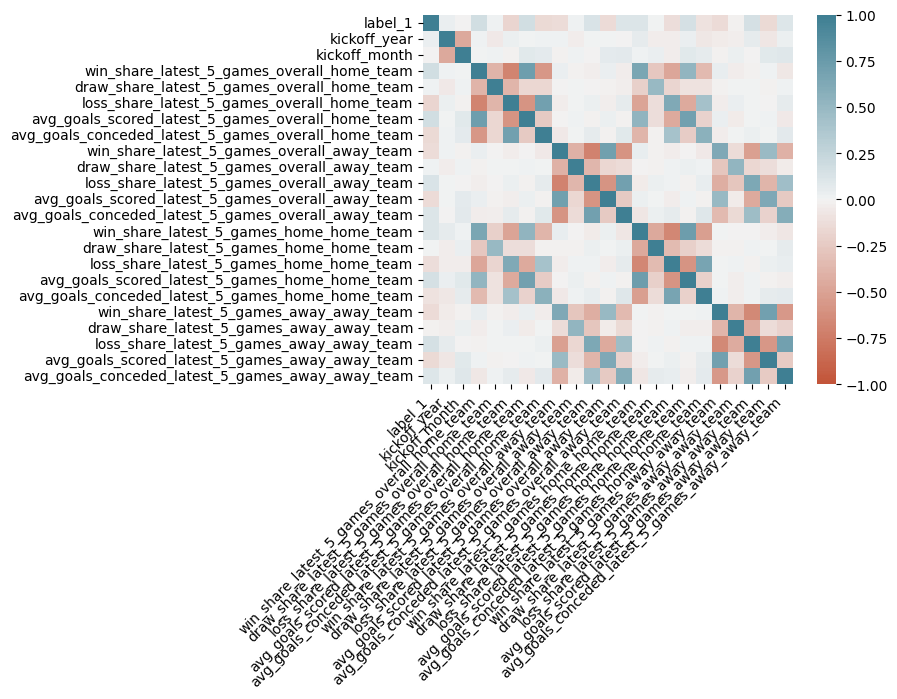

In [12]:
import seaborn as sns

corr = df[numeric_features].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Plot features against target

In [13]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

def plot_feature_against_target(df, feature, target):
    
    if is_string_dtype(df[feature]) or (is_numeric_dtype(df[feature]) and len(df[feature].unique()) <= 13):
        dfg = df.groupby(feature).agg(
            mean = (target, np.mean),
            n = (target, np.size))
        #ax = dfg.plot.bar(figsize=(15, 7.5), ylabel='Average target', title = feature)
        dfg.plot(figsize=(15, 7.5), kind='bar', secondary_y= 'n', rot= 0, title = feature)
        print(dfg.sort_values('mean'))
        
    elif is_numeric_dtype(df[feature]):
        
        bins = np.nanpercentile(df[feature], [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 100])
        bins = [i for n, i in enumerate(bins) if i not in bins[:n]]
        bins[0] = np.floor(bins[0])
        bins[-1] = np.ceil(bins[-1])
        
        df_temp = pd.DataFrame({feature: df[feature], target: df[target]})
        df_temp[feature+'_bins'] = pd.cut(pd.to_numeric(df[feature]), bins, include_lowest=True)
        
        dfg = df_temp.groupby(feature+'_bins').agg(
            mean = (target, np.mean),
            n = (target, np.size))
        #ax = dfg.plot.bar(figsize=(15, 7.5), ylabel='Average target', title = feature)
        dfg.plot(figsize=(15, 7.5), kind='bar', secondary_y= 'n', rot= 0, title = feature)
        print(dfg)

        
    plt.show()

                       mean    n
season_start_year               
20                 0.381616  359
21                 0.419444  360
19                 0.455556  360
22                 0.481375  349


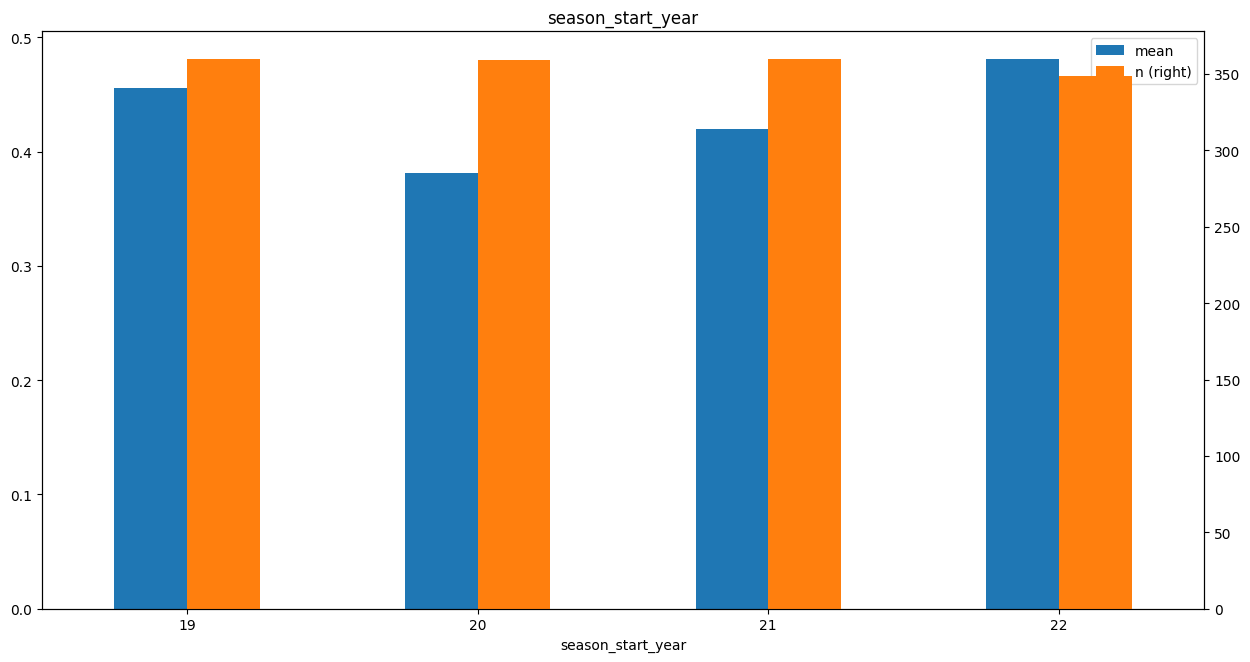

          mean   n
home              
NOR   0.166667  36
WBA   0.166667  18
WAT   0.194444  36
BOU   0.277778  36
LEE   0.283019  53
FUL   0.285714  35
BUR   0.296296  54
SOU   0.309859  71
BHA   0.319444  72
CRY   0.352113  71
EVE   0.352113  71
NFO   0.388889  18
SHU   0.388889  36
AVL   0.394366  71
BRE   0.400000  35
NEW   0.416667  72
WOL   0.430556  72
WHU   0.444444  72
LEI   0.450704  71
CHE   0.478873  71
MUN   0.571429  70
ARS   0.577465  71
TOT   0.611111  72
LIV   0.736111  72
MCI   0.805556  72


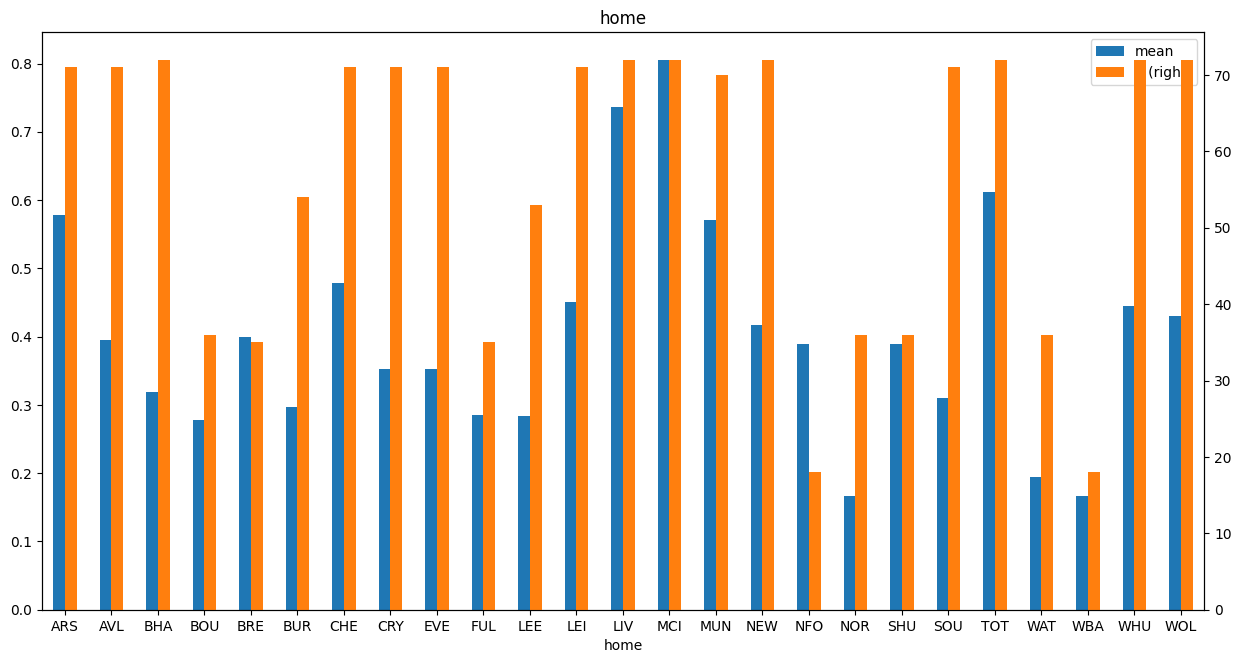

          mean   n
away              
MCI   0.169014  71
LIV   0.225352  71
MUN   0.287671  73
CHE   0.323944  71
ARS   0.347222  72
TOT   0.380282  71
BHA   0.380282  71
LEI   0.422535  71
BUR   0.425926  54
FUL   0.428571  35
NEW   0.436620  71
WOL   0.436620  71
BRE   0.444444  36
EVE   0.486111  72
CRY   0.486111  72
AVL   0.486111  72
WHU   0.492958  71
SOU   0.507042  71
LEE   0.555556  54
SHU   0.583333  36
WBA   0.611111  18
WAT   0.638889  36
BOU   0.685714  35
NFO   0.705882  17
NOR   0.722222  36


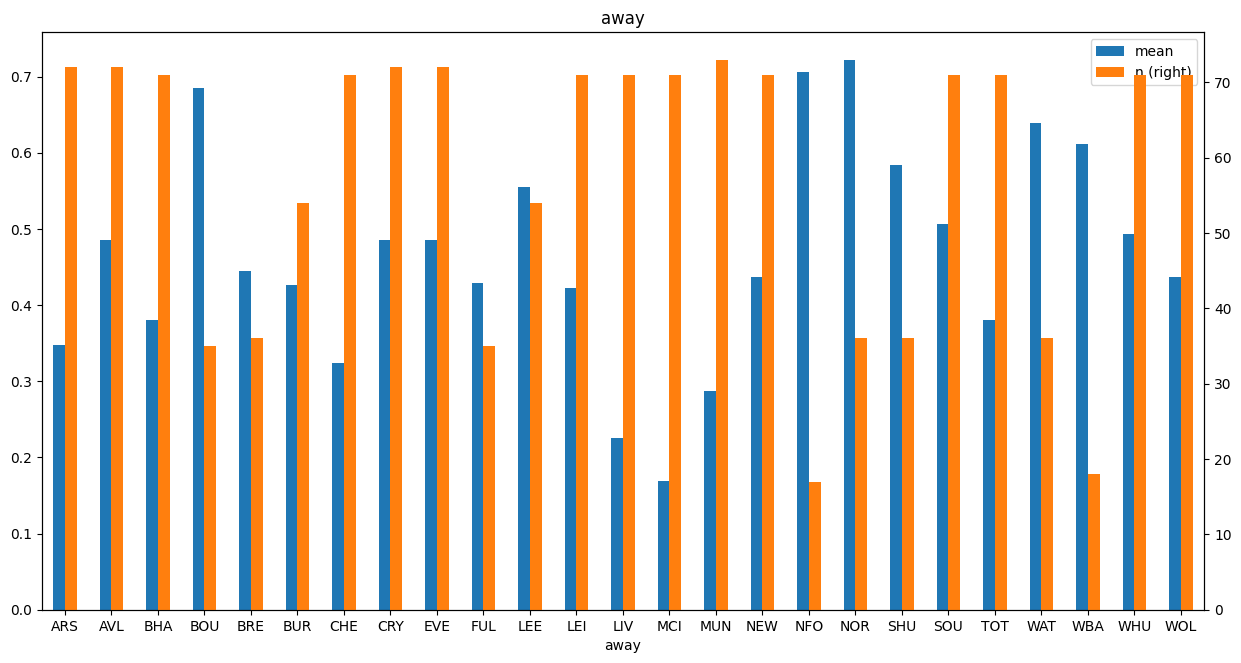

         mean    n
label_1           
0         0.0  808
1         1.0  620


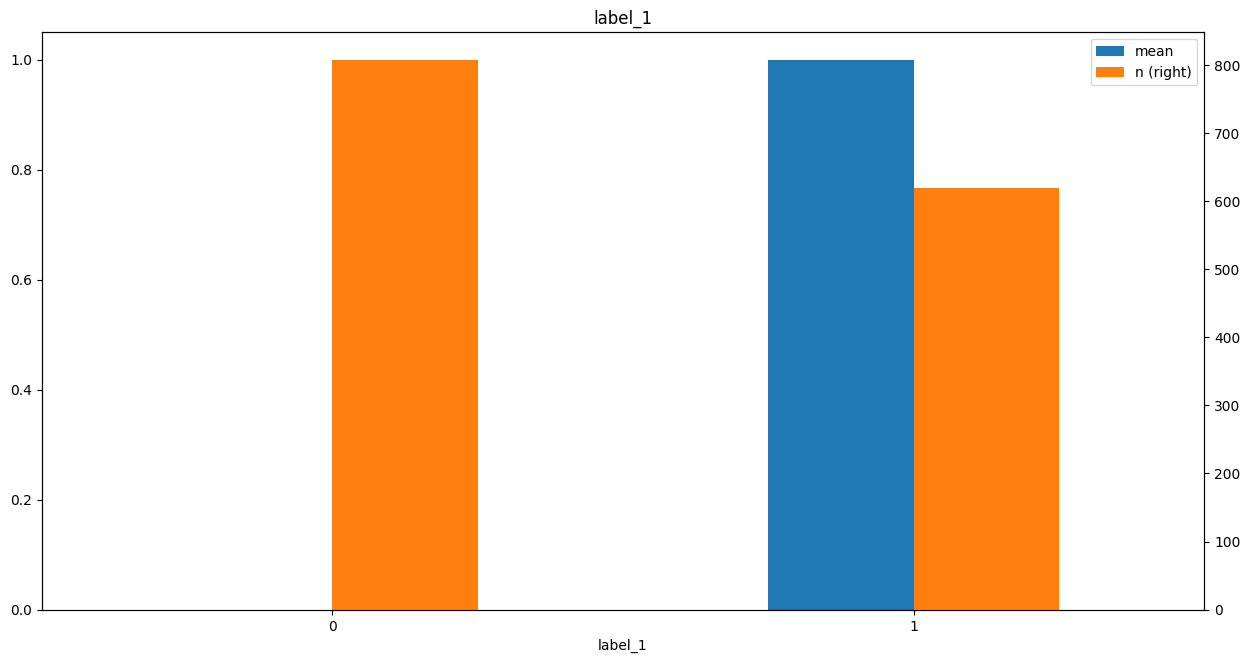

                  mean    n
kickoff_year               
2021          0.391753  388
2020          0.431746  315
2019          0.435754  179
2022          0.451613  341
2023          0.487805  205


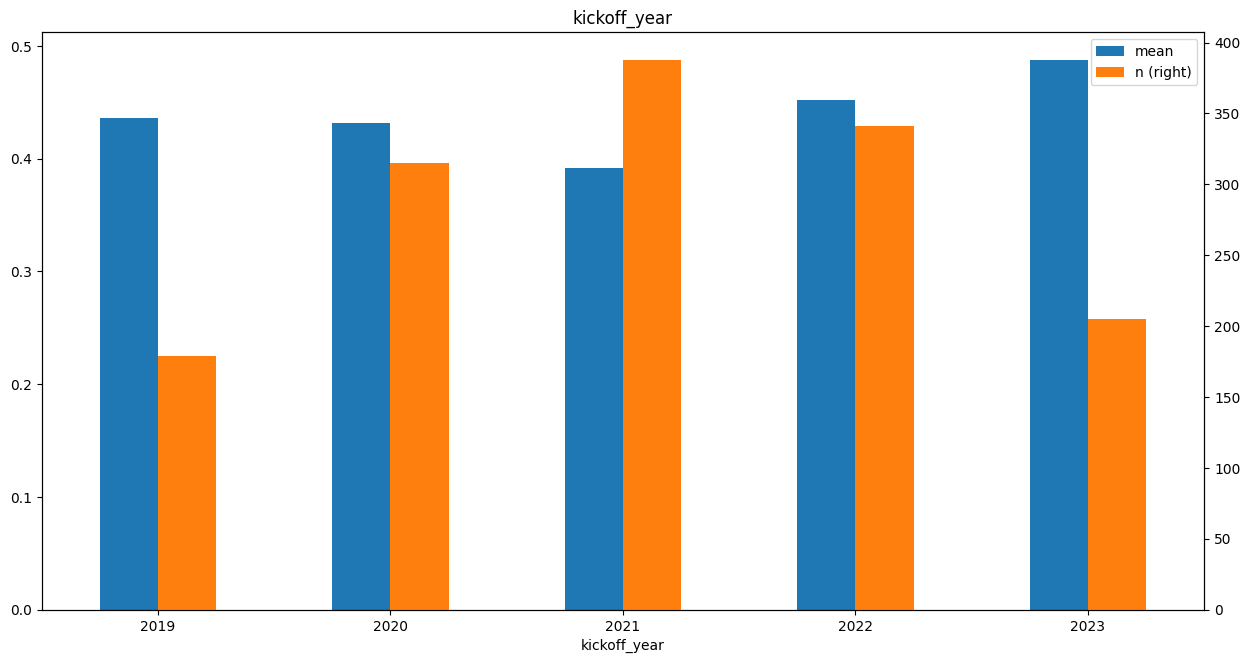

                   mean    n
kickoff_month               
6              0.384615   26
1              0.394904  157
8              0.403509   57
12             0.405263  190
10             0.413580  162
2              0.417647  170
9              0.425287   87
4              0.450331  151
11             0.459677  124
5              0.476923  130
3              0.490741  108
7              0.500000   66


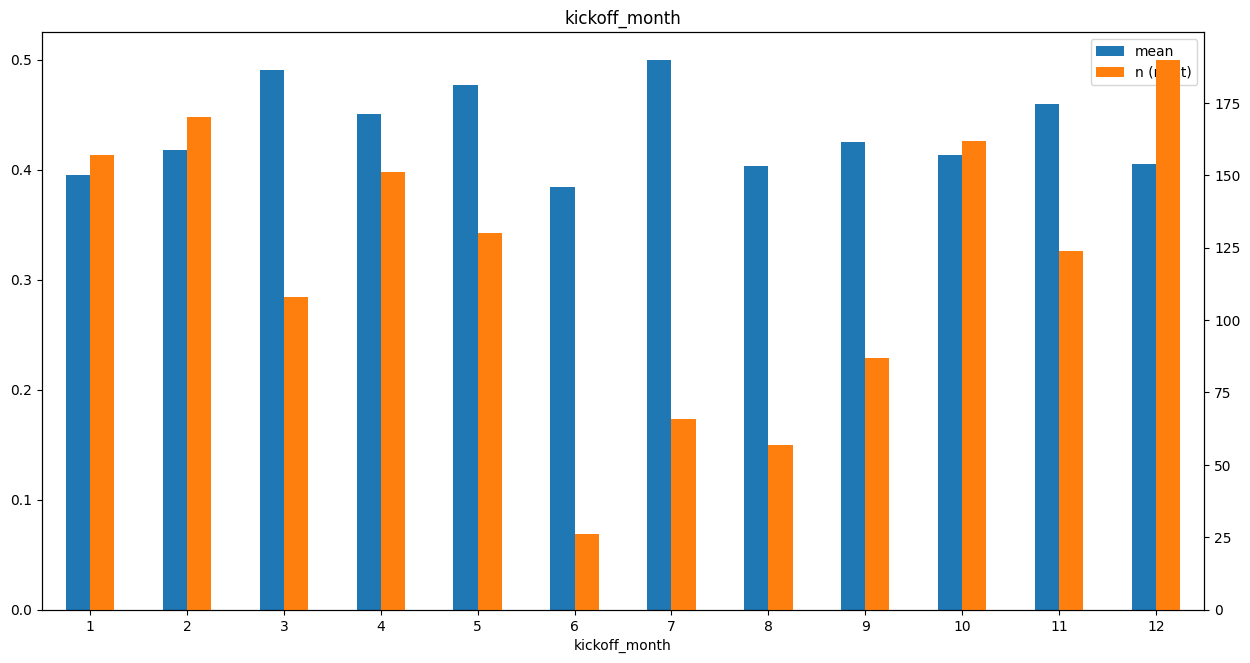

                                                mean    n
win_share_latest_5_games_overall_home_team               
0.500000                                    0.130435   23
0.000000                                    0.322917  192
0.200000                                    0.363144  369
0.400000                                    0.434783  414
0.333333                                    0.500000   20
0.750000                                    0.500000    6
0.800000                                    0.526316   95
0.250000                                    0.533333   15
0.600000                                    0.534783  230
0.666667                                    0.700000   10
1.000000                                    0.740741   54


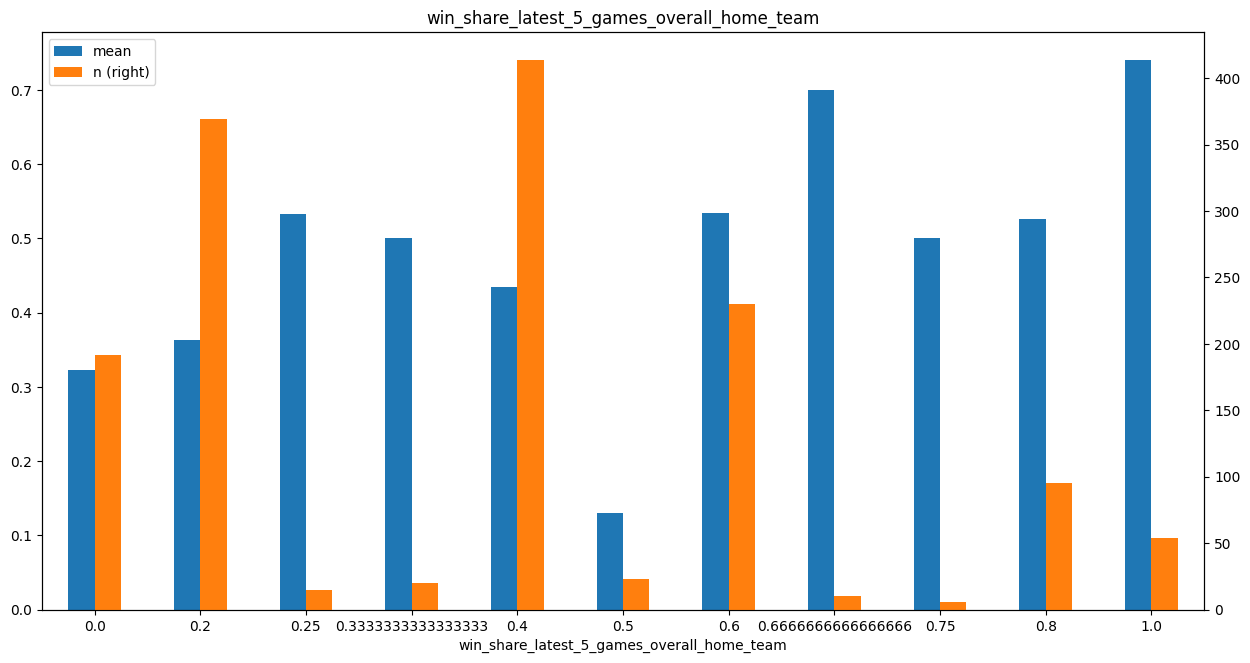

                                                 mean    n
draw_share_latest_5_games_overall_home_team               
0.750000                                     0.000000    1
0.250000                                     0.277778   18
0.800000                                     0.294118   17
1.000000                                     0.333333    3
0.000000                                     0.412776  407
0.600000                                     0.431373  102
0.500000                                     0.437500   16
0.200000                                     0.445312  512
0.400000                                     0.446483  327
0.666667                                     0.500000    6
0.333333                                     0.684211   19


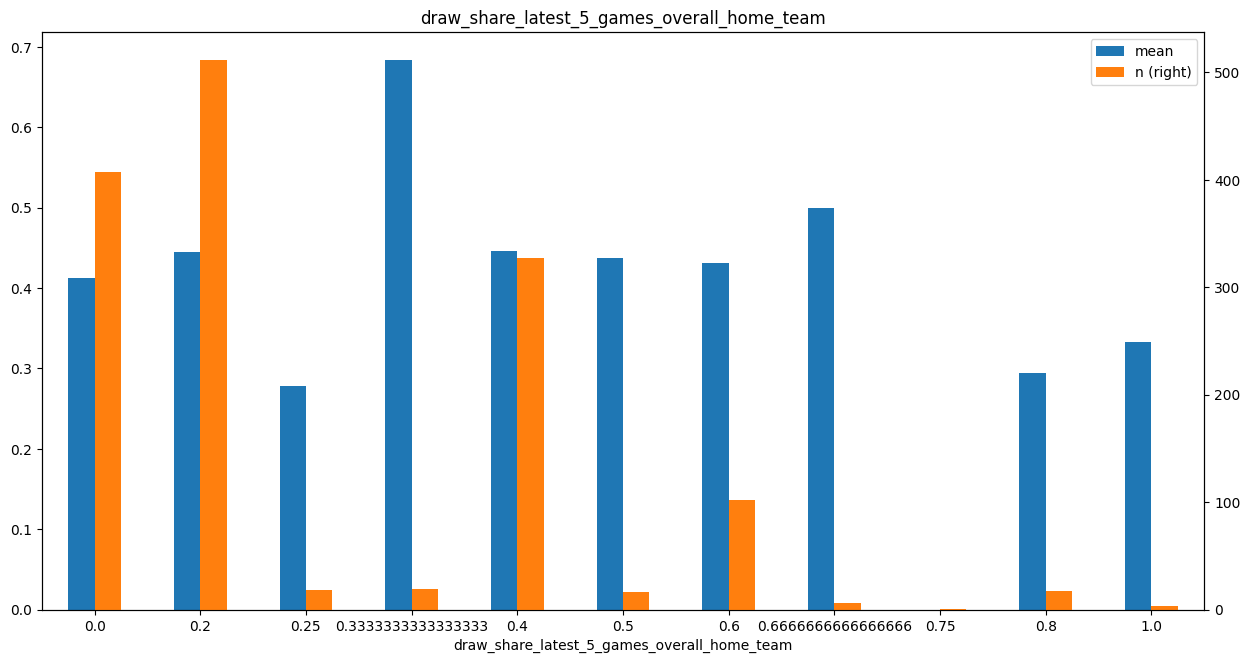

                                                 mean    n
loss_share_latest_5_games_overall_home_team               
0.750000                                     0.090909   11
1.000000                                     0.243243   37
0.666667                                     0.285714    7
0.500000                                     0.312500   16
0.600000                                     0.324723  271
0.250000                                     0.333333   15
0.800000                                     0.358974  117
0.400000                                     0.436893  412
0.200000                                     0.481132  318
0.333333                                     0.500000   20
0.000000                                     0.612745  204


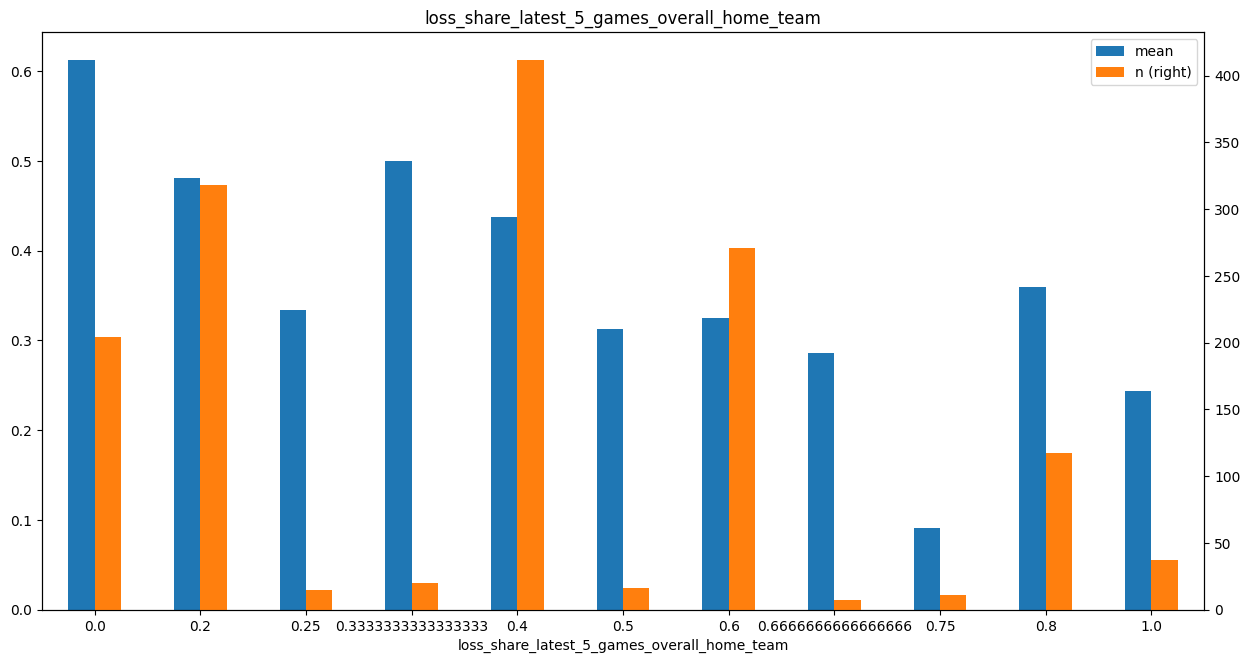

                                                        mean    n
avg_goals_scored_latest_5_games_overall_home_te...               
(-0.001, 0.4]                                       0.343434   99
(0.4, 0.6]                                          0.275591  127
(0.6, 0.8]                                          0.380368  163
(0.8, 1.0]                                          0.409756  205
(1.0, 1.2]                                          0.436709  158
(1.2, 1.4]                                          0.421053  152
(1.4, 1.6]                                          0.464912  114
(1.6, 2.0]                                          0.468293  205
(2.0, 2.215]                                        0.516129   62
(2.215, 2.8]                                        0.600000   80
(2.8, 5.0]                                          0.682540   63


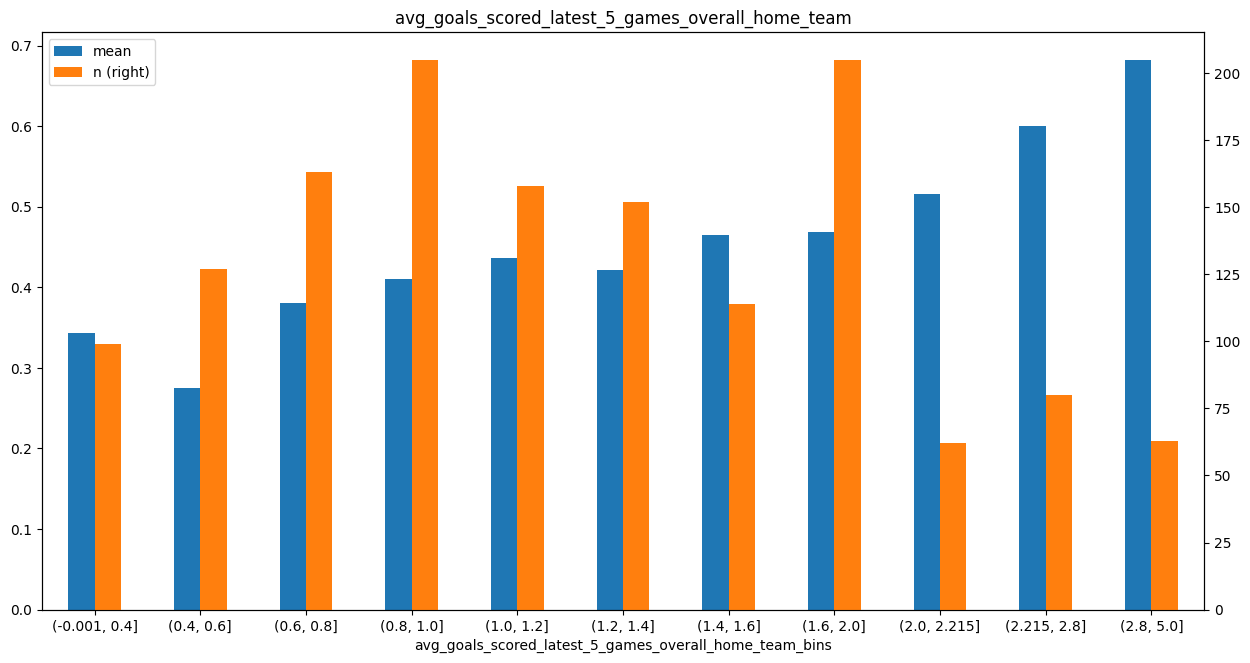

                                                        mean    n
avg_goals_conceded_latest_5_games_overall_home_...               
(-0.001, 0.4]                                       0.556701   97
(0.4, 0.6]                                          0.528302  106
(0.6, 0.8]                                          0.573643  129
(0.8, 1.0]                                          0.463576  151
(1.0, 1.2]                                          0.414365  181
(1.2, 1.4]                                          0.451429  175
(1.4, 1.6]                                          0.386905  168
(1.6, 1.8]                                          0.407895  152
(1.8, 2.2]                                          0.333333  162
(2.2, 2.4]                                          0.256410   39
(2.4, 4.0]                                          0.308824   68


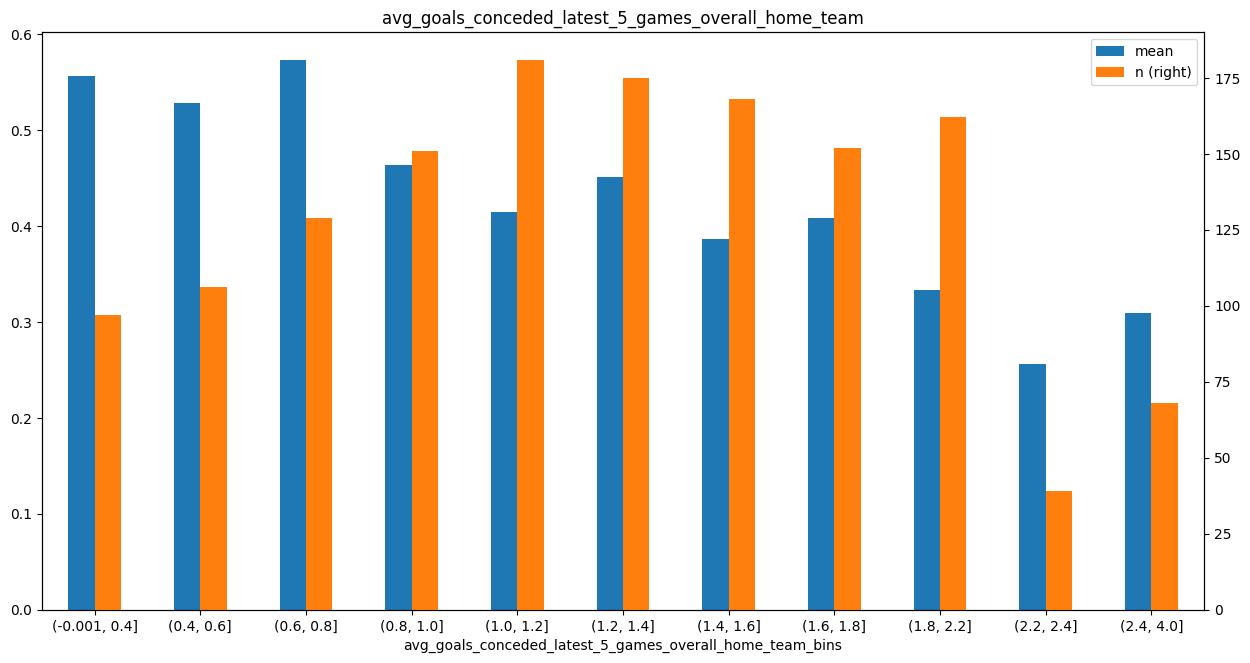

                                                mean    n
win_share_latest_5_games_overall_away_team               
1.000000                                    0.170213   47
0.666667                                    0.285714    7
0.800000                                    0.312500  112
0.500000                                    0.366667   30
0.600000                                    0.381481  270
0.250000                                    0.384615   13
0.400000                                    0.469974  383
0.200000                                    0.481050  343
0.000000                                    0.494949  198
0.750000                                    0.500000    8
0.333333                                    0.529412   17


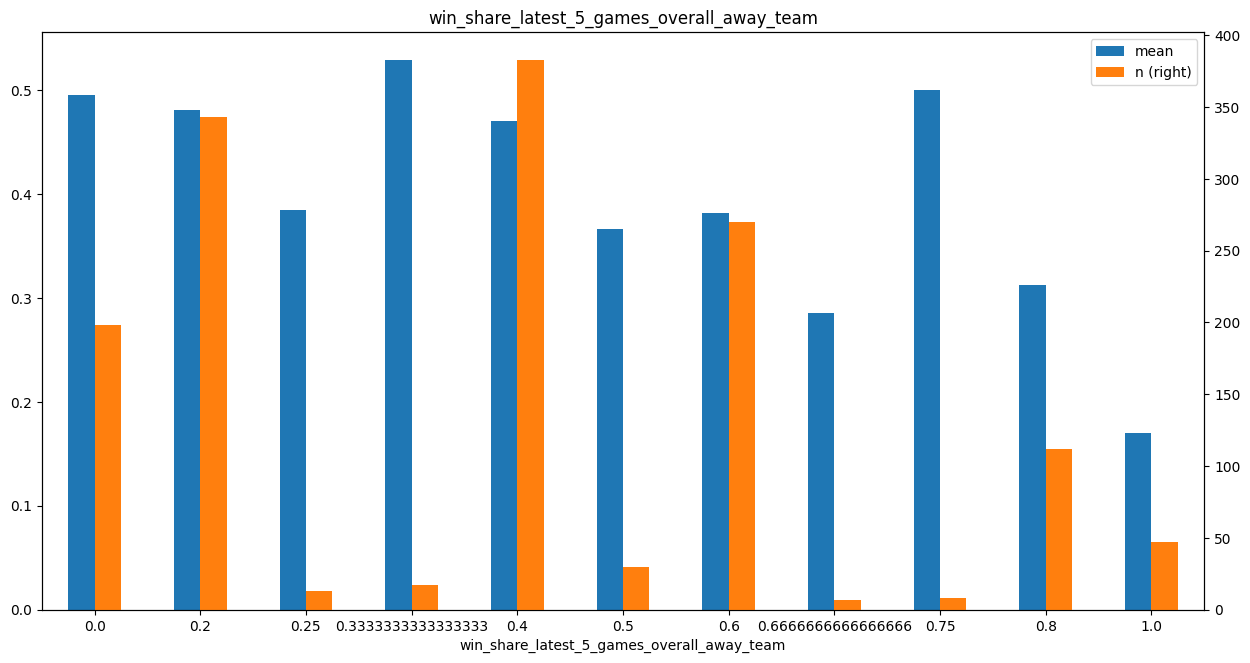

                                                 mean    n
draw_share_latest_5_games_overall_away_team               
0.500000                                     0.250000   24
0.000000                                     0.402439  410
0.600000                                     0.408163   98
0.800000                                     0.411765   17
0.400000                                     0.449848  329
0.200000                                     0.456863  510
0.250000                                     0.500000   16
0.666667                                     0.500000    2
0.750000                                     0.500000    2
0.333333                                     0.529412   17
1.000000                                     0.666667    3


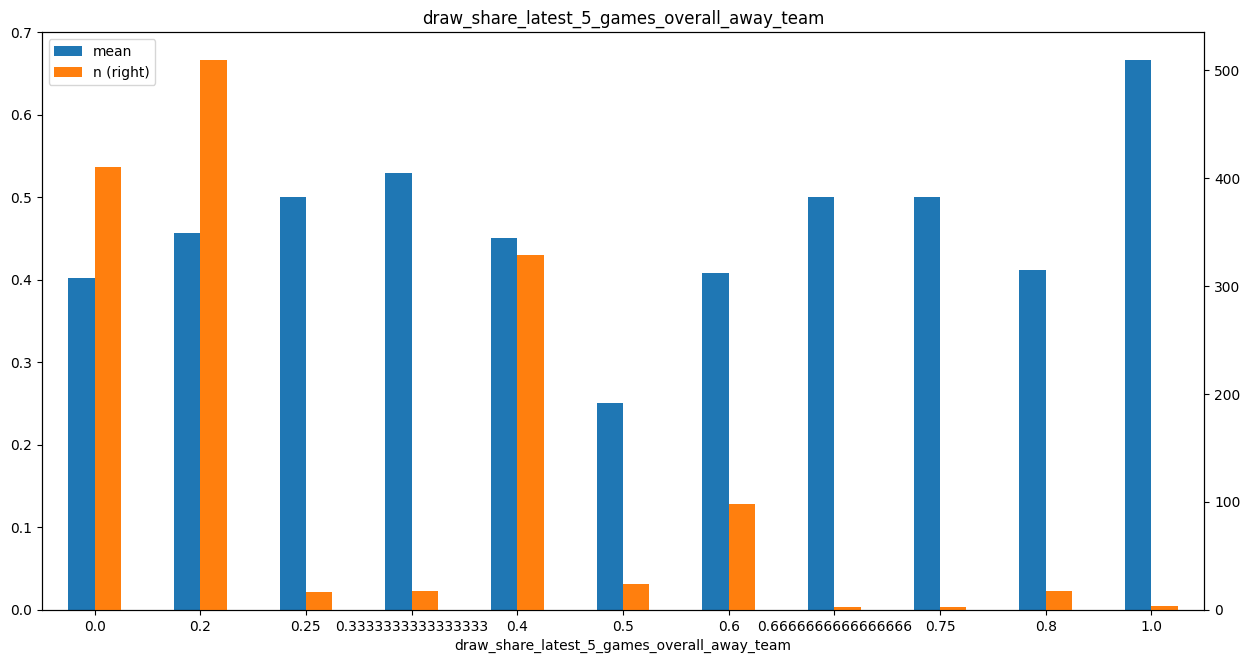

                                                 mean    n
loss_share_latest_5_games_overall_away_team               
0.500000                                     0.233333   30
0.750000                                     0.250000    4
0.000000                                     0.319048  210
0.250000                                     0.384615   13
0.200000                                     0.405028  358
0.400000                                     0.447368  380
0.333333                                     0.454545   11
1.000000                                     0.468750   32
0.600000                                     0.501946  257
0.800000                                     0.561983  121
0.666667                                     0.666667   12


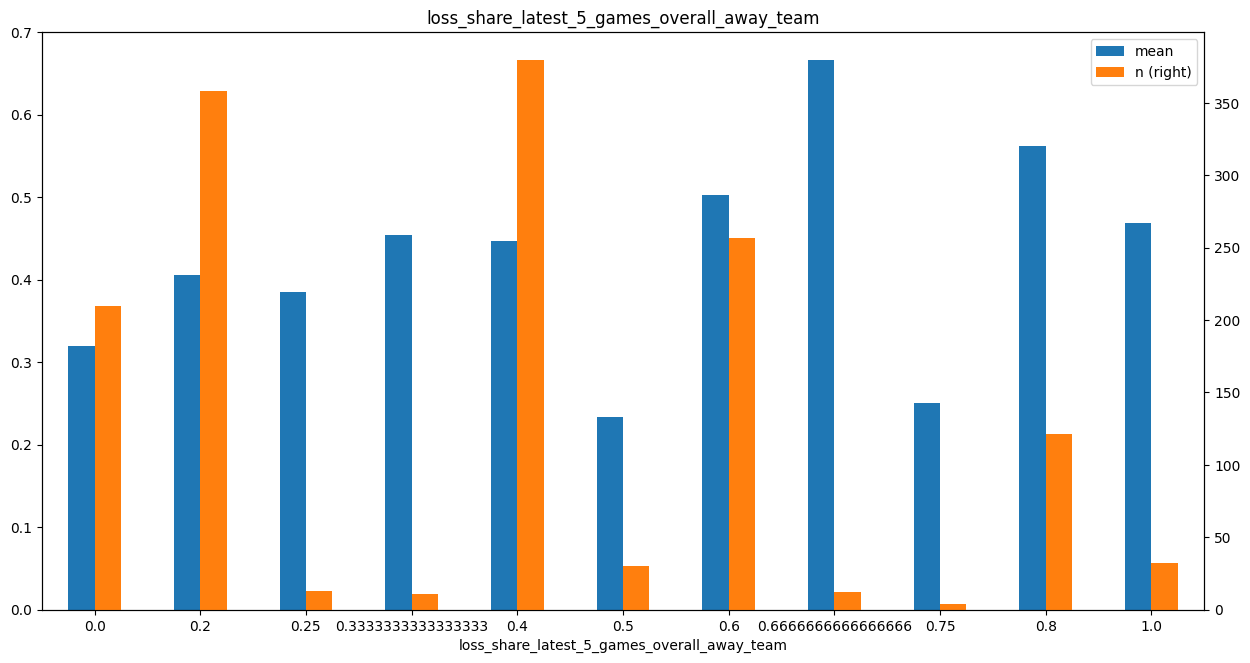

                                                        mean    n
avg_goals_scored_latest_5_games_overall_away_te...               
(-0.001, 0.4]                                       0.532110  109
(0.4, 0.6]                                          0.425743  101
(0.6, 0.8]                                          0.488235  170
(0.8, 1.0]                                          0.400000  170
(1.0, 1.2]                                          0.485207  169
(1.2, 1.4]                                          0.542484  153
(1.4, 1.6]                                          0.447368  152
(1.6, 2.0]                                          0.406250  192
(2.0, 2.4]                                          0.352381  105
(2.4, 2.6]                                          0.289474   38
(2.6, 5.0]                                          0.130435   69


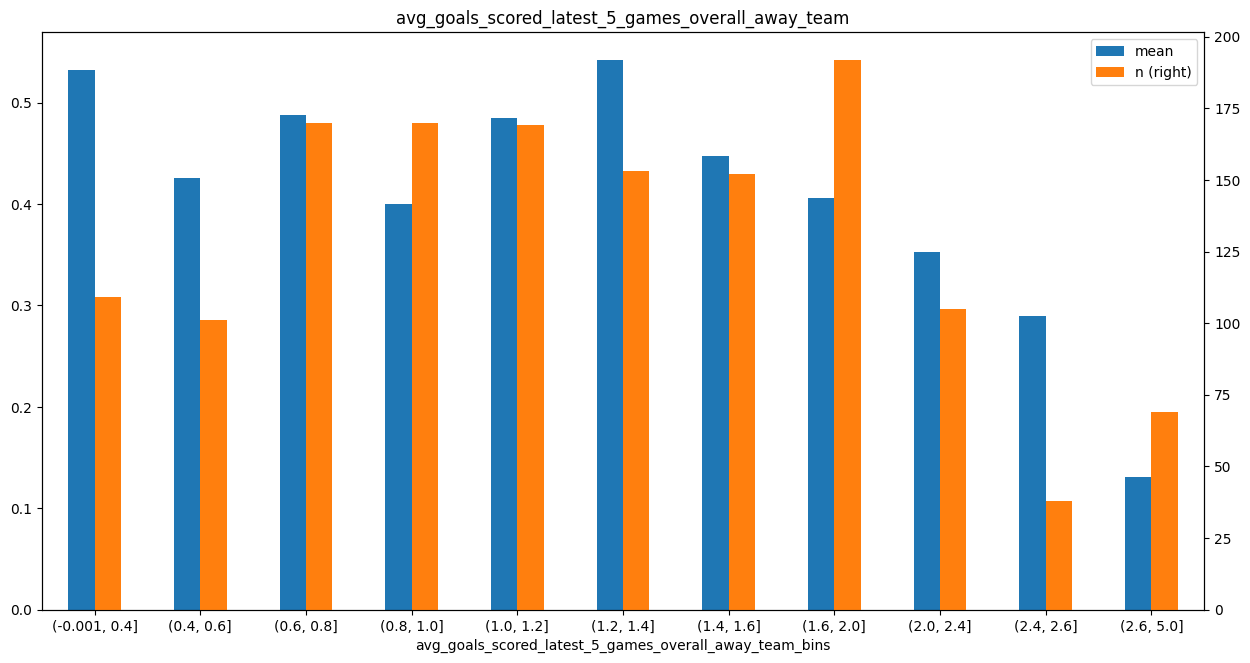

                                                        mean    n
avg_goals_conceded_latest_5_games_overall_away_...               
(-0.001, 0.4]                                       0.274510  102
(0.4, 0.6]                                          0.339806  103
(0.6, 0.8]                                          0.442857  140
(0.8, 1.0]                                          0.369565  184
(1.0, 1.2]                                          0.464088  181
(1.2, 1.25]                                         0.800000    5
(1.25, 1.4]                                         0.478261  161
(1.4, 1.6]                                          0.410959  146
(1.6, 1.8]                                          0.500000  138
(1.8, 2.2]                                          0.479730  148
(2.2, 2.4]                                          0.551020   49
(2.4, 4.0]                                          0.492958   71


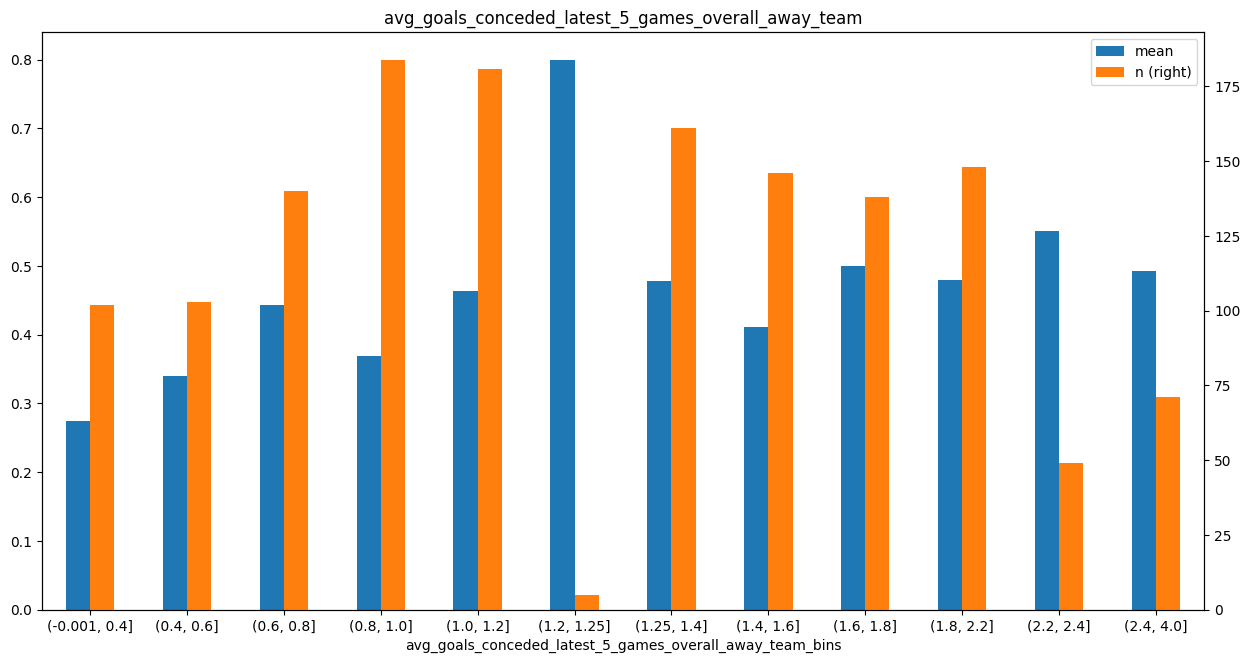

                                             mean    n
win_share_latest_5_games_home_home_team               
0.750000                                 0.200000   10
0.666667                                 0.321429   28
0.000000                                 0.370787  178
0.500000                                 0.391304   69
0.200000                                 0.392086  278
0.333333                                 0.416667   24
0.400000                                 0.424157  356
0.250000                                 0.444444   27
0.600000                                 0.444444  243
0.800000                                 0.536082   97
1.000000                                 0.627119  118


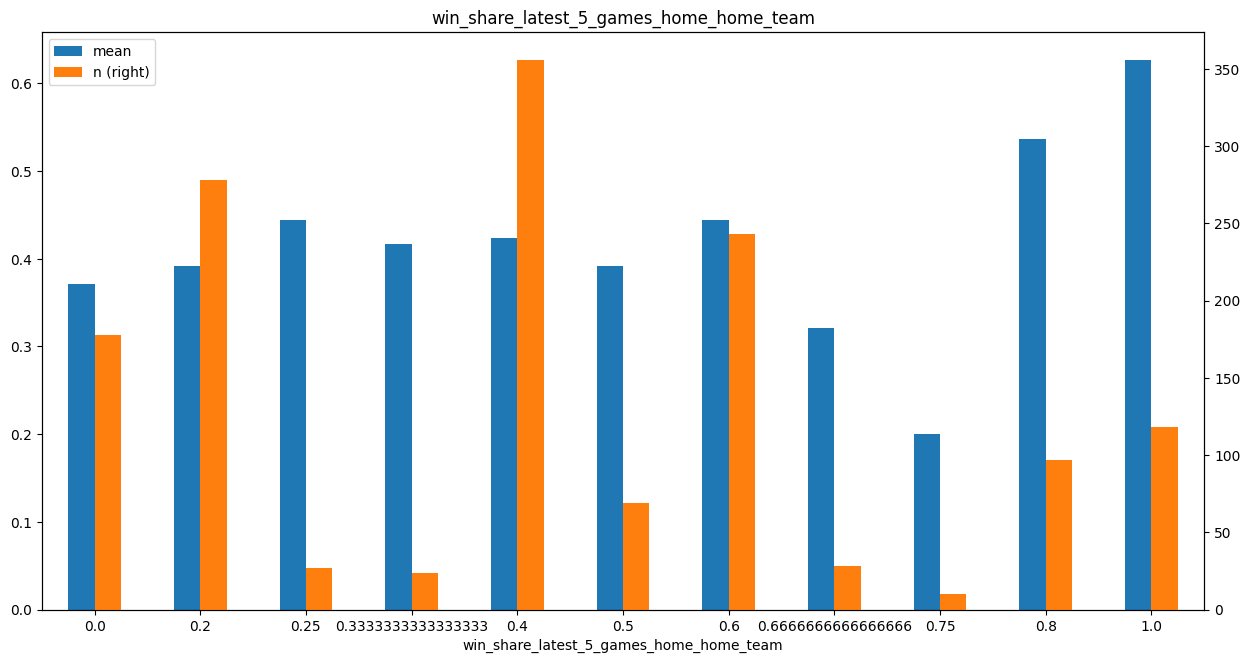

                                              mean    n
draw_share_latest_5_games_home_home_team               
0.250000                                  0.314286   35
0.333333                                  0.368421   38
0.800000                                  0.400000   15
1.000000                                  0.409091   22
0.000000                                  0.428879  464
0.400000                                  0.435115  262
0.200000                                  0.446469  439
0.500000                                  0.446809   47
0.600000                                  0.450549   91
0.750000                                  0.500000    2
0.666667                                  0.615385   13


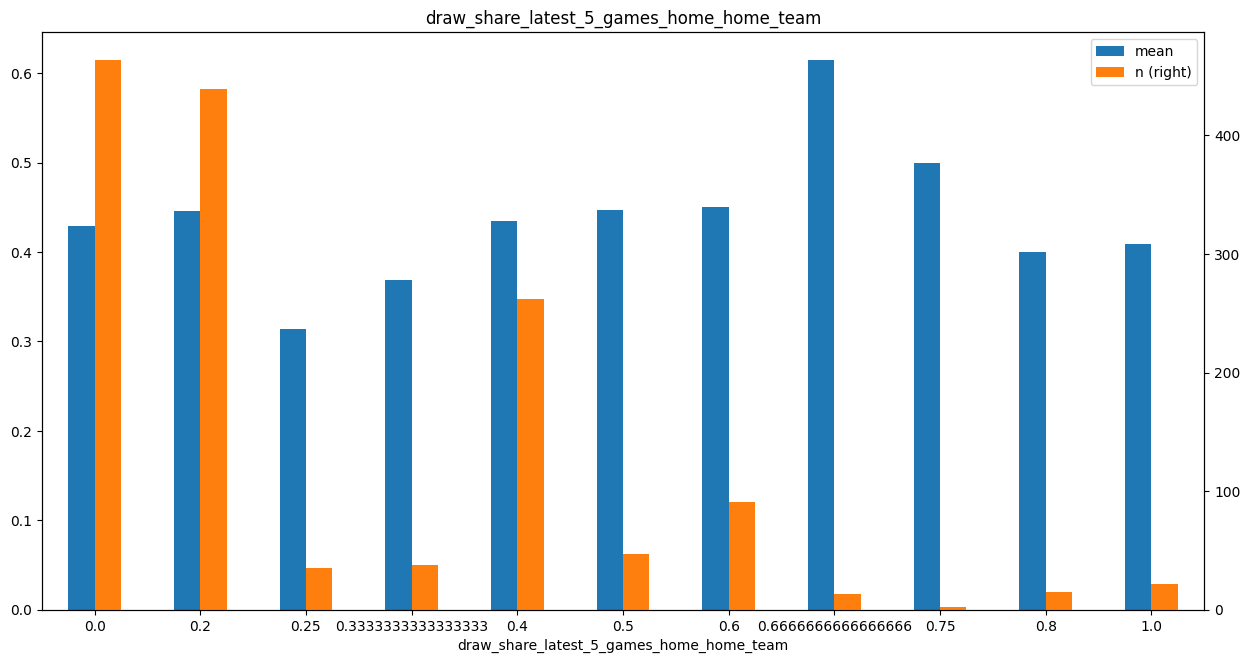

                                              mean    n
loss_share_latest_5_games_home_home_team               
0.500000                                  0.293103   58
1.000000                                  0.326923   52
0.750000                                  0.333333    9
0.800000                                  0.365079   63
0.600000                                  0.369231  195
0.250000                                  0.371429   35
0.666667                                  0.384615   13
0.400000                                  0.395639  321
0.333333                                  0.475000   40
0.200000                                  0.476038  313
0.000000                                  0.531915  329


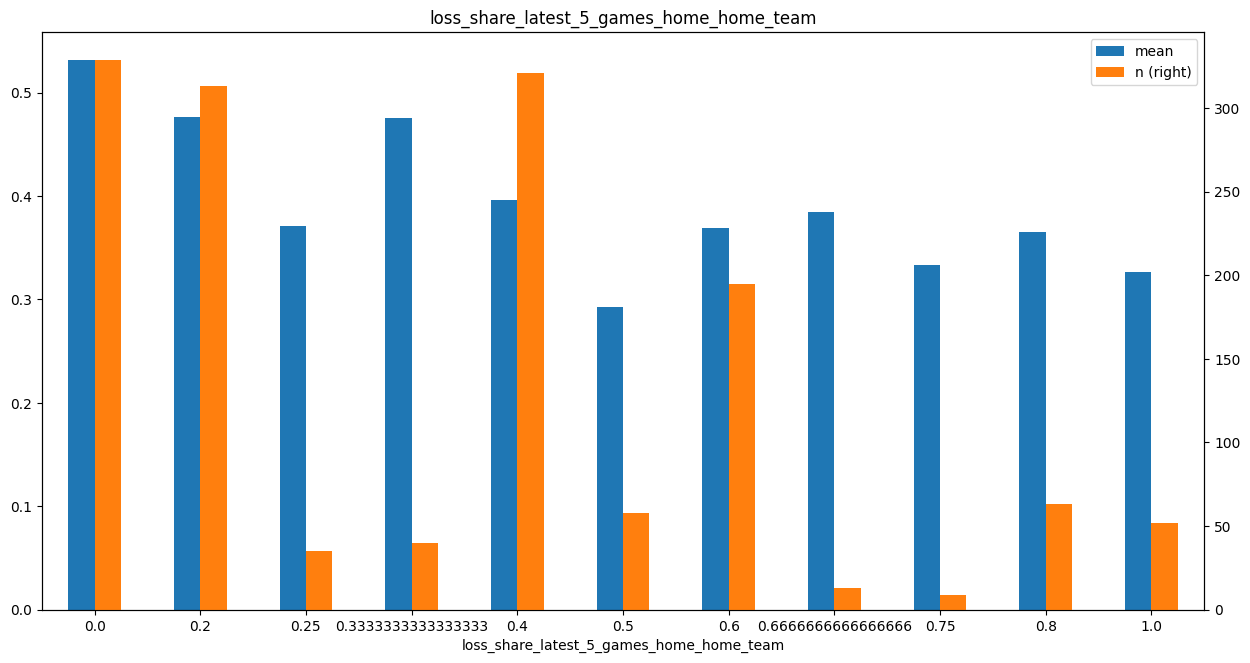

                                                        mean    n
avg_goals_scored_latest_5_games_home_home_team_...               
(-0.001, 0.4]                                       0.354167   96
(0.4, 0.6]                                          0.420455   88
(0.6, 0.8]                                          0.393443  122
(0.8, 1.0]                                          0.326087  184
(1.0, 1.2]                                          0.367647  136
(1.2, 1.4]                                          0.398964  193
(1.4, 1.6]                                          0.489051  137
(1.6, 1.8]                                          0.427083   96
(1.8, 2.0]                                          0.427184  103
(2.0, 2.6]                                          0.583333  144
(2.6, 3.0]                                          0.516667   60
(3.0, 5.0]                                          0.681159   69


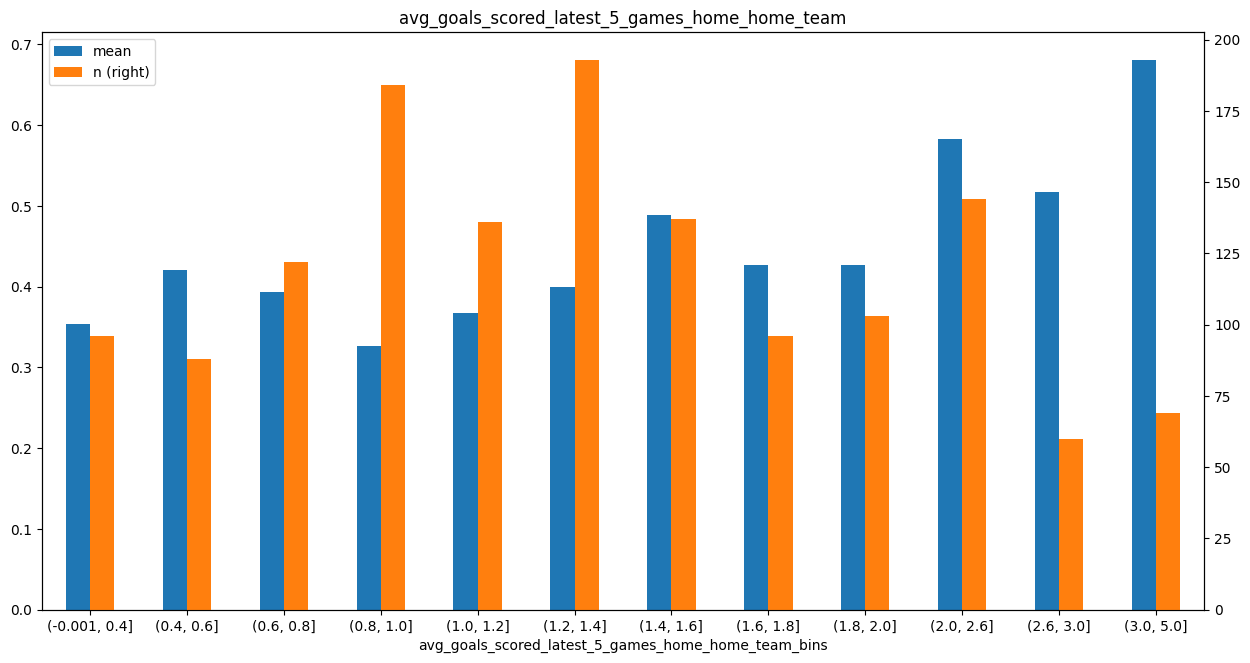

                                                        mean    n
avg_goals_conceded_latest_5_games_home_home_tea...               
(-0.001, 0.4]                                       0.492063  126
(0.4, 0.57]                                         0.529412   17
(0.57, 0.8]                                         0.505455  275
(0.8, 1.0]                                          0.397541  244
(1.0, 1.2]                                          0.440789  152
(1.2, 1.4]                                          0.465839  161
(1.4, 1.5]                                          0.440000   25
(1.5, 1.8]                                          0.409756  205
(1.8, 2.0]                                          0.436170   94
(2.0, 2.5]                                          0.323077   65
(2.5, 5.0]                                          0.218750   64


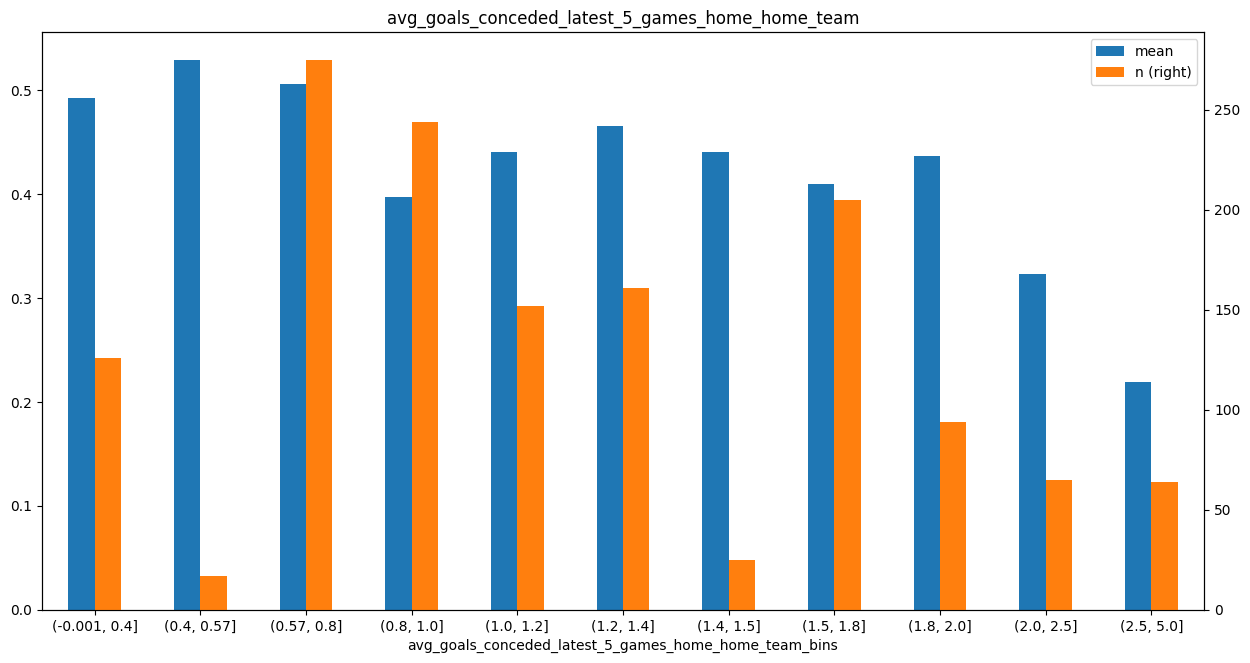

                                             mean    n
win_share_latest_5_games_away_away_team               
0.750000                                 0.000000    8
0.800000                                 0.240000   75
0.500000                                 0.296296   54
1.000000                                 0.313433   67
0.600000                                 0.345912  159
0.333333                                 0.392857   28
0.250000                                 0.416667   24
0.666667                                 0.444444   18
0.400000                                 0.463816  304
0.200000                                 0.481081  370
0.000000                                 0.504673  321


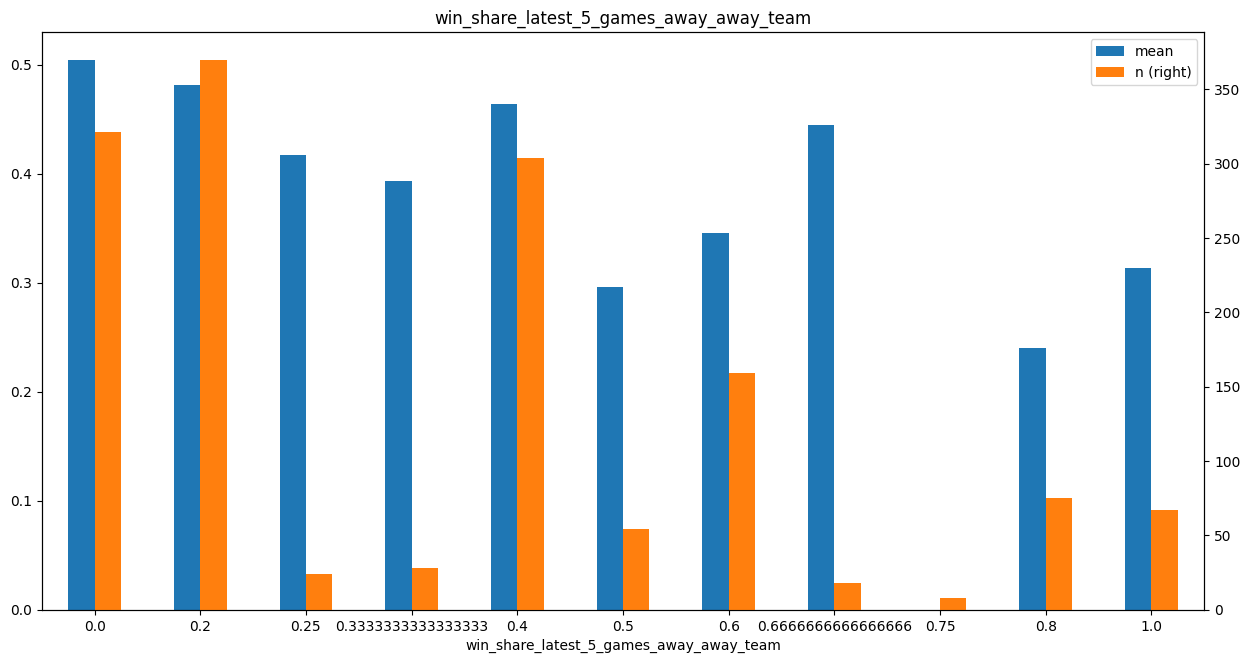

                                              mean    n
draw_share_latest_5_games_away_away_team               
0.800000                                  0.148148   27
0.250000                                  0.346154   26
0.666667                                  0.368421   19
0.500000                                  0.377778   45
0.200000                                  0.417051  434
0.600000                                  0.434211   76
0.000000                                  0.439834  482
1.000000                                  0.478261   23
0.400000                                  0.481203  266
0.333333                                  0.560000   25
0.750000                                  0.800000    5


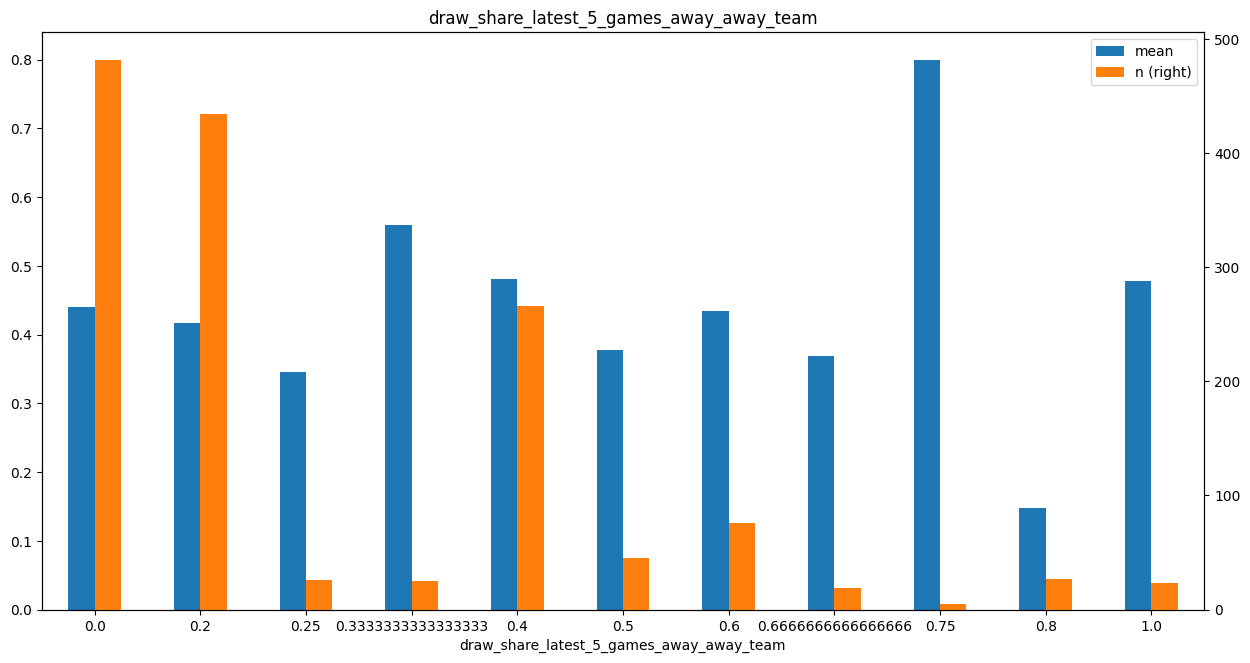

                                              mean    n
loss_share_latest_5_games_away_away_team               
0.000000                                  0.284483  232
0.500000                                  0.333333   63
0.250000                                  0.350000   20
0.200000                                  0.377451  204
0.400000                                  0.471125  329
0.600000                                  0.477966  295
0.333333                                  0.500000   32
1.000000                                  0.500000   88
0.800000                                  0.556452  124
0.666667                                  0.583333   24
0.750000                                  0.588235   17


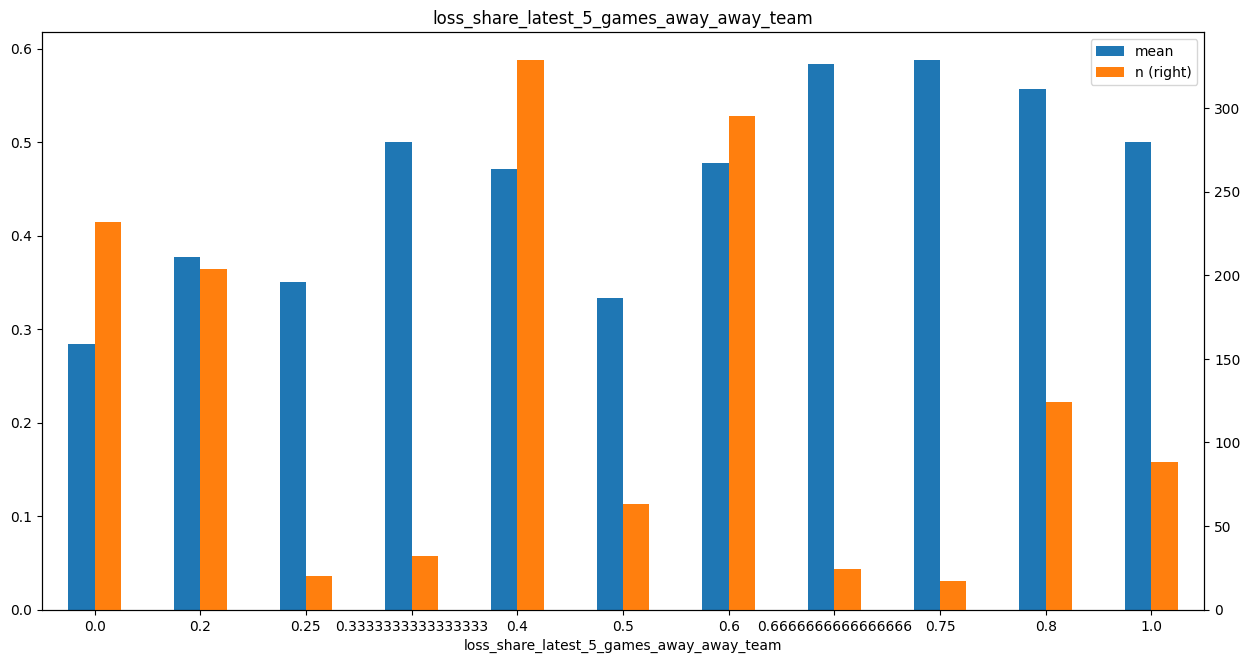

                                                        mean    n
avg_goals_scored_latest_5_games_away_away_team_...               
(-0.001, 0.279]                                     0.555556   72
(0.279, 0.5]                                        0.569767   86
(0.5, 0.6]                                          0.476923  130
(0.6, 0.8]                                          0.488506  174
(0.8, 1.0]                                          0.410138  217
(1.0, 1.2]                                          0.516340  153
(1.2, 1.333]                                        0.592593   27
(1.333, 1.6]                                        0.392562  242
(1.6, 1.8]                                          0.321839   87
(1.8, 2.2]                                          0.373016  126
(2.2, 2.6]                                          0.259259   54
(2.6, 6.0]                                          0.266667   60


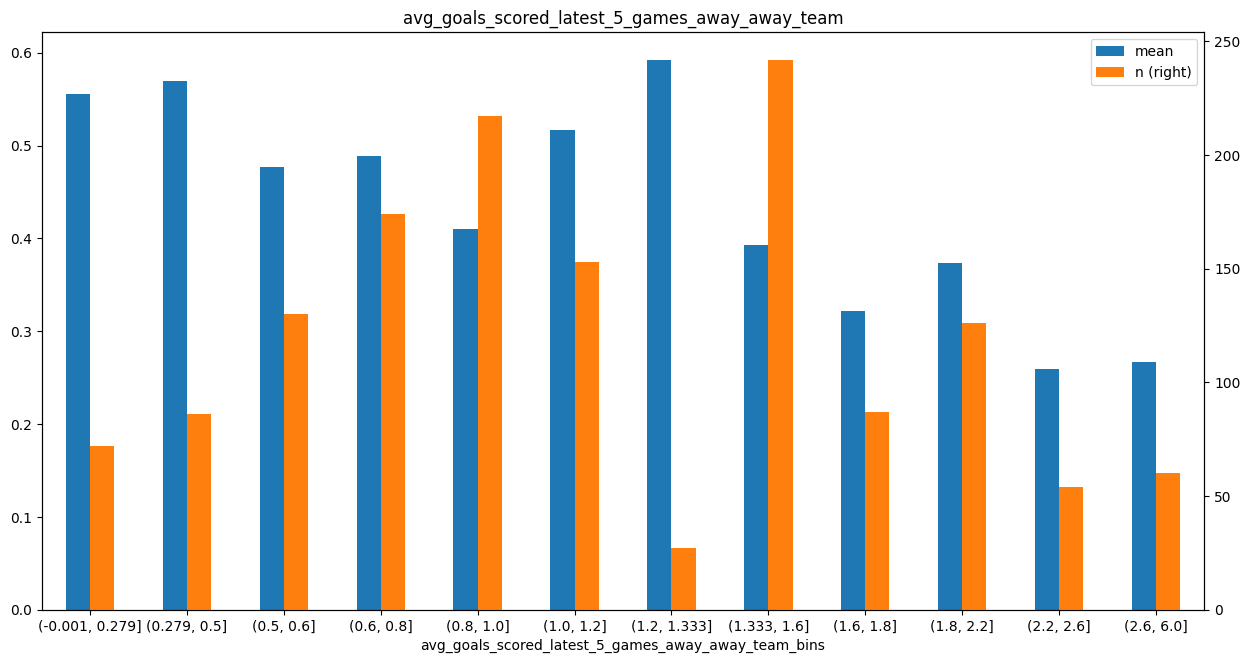

                                                        mean    n
avg_goals_conceded_latest_5_games_away_away_tea...               
(-0.001, 0.4]                                       0.305882   85
(0.4, 0.6]                                          0.280899   89
(0.6, 1.0]                                          0.378277  267
(1.0, 1.2]                                          0.460993  141
(1.2, 1.4]                                          0.455621  169
(1.4, 1.6]                                          0.447674  172
(1.6, 1.8]                                          0.480000  125
(1.8, 2.0]                                          0.500000  134
(2.0, 2.4]                                          0.495935  123
(2.4, 2.667]                                        0.480769   52
(2.667, 7.0]                                        0.507042   71


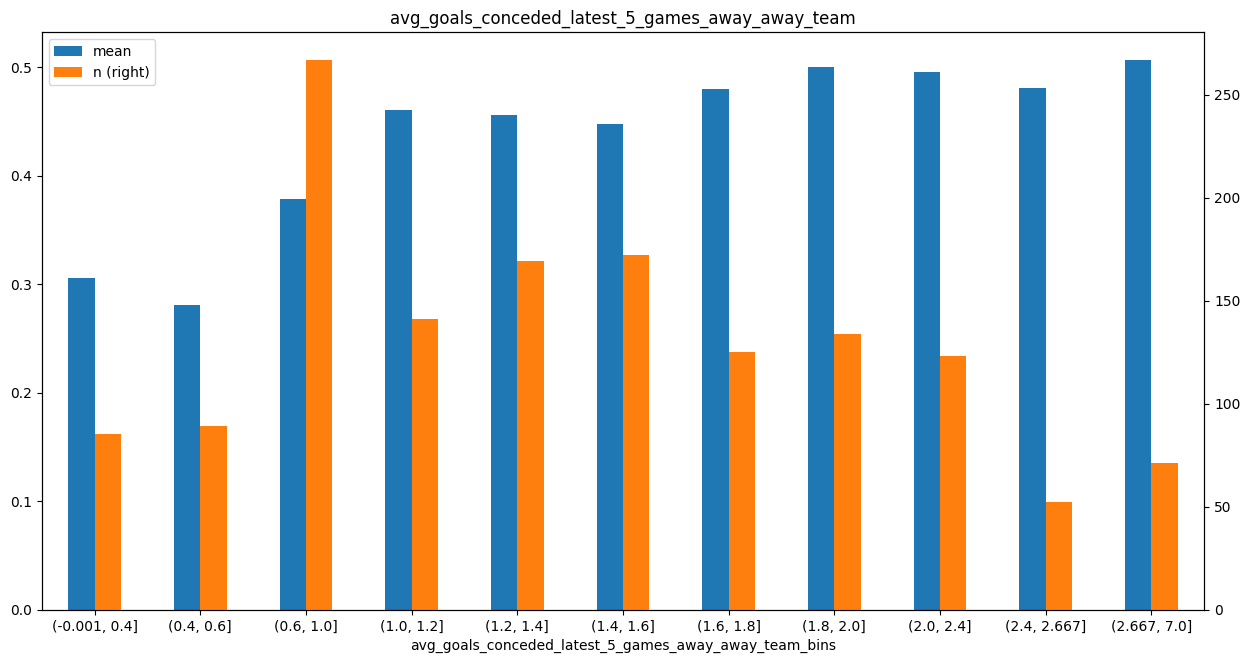

In [15]:
features = categorical_features + numeric_features
for p in features:
    plot_feature_against_target(df, p, label)